# JSON Based Data Exercise

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [3]:
#The following imports and dataset will be used to complete all exercises.

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import json_normalize
file = 'C:\\Users\\Kevin Sharp\\Desktop\\Springboard\\1574117884_data_wrangling_json_5_\\data_wrangling_json\\data\\world_bank_projects.json'
json_df = pd.read_json(file)

1. Find the 10 countries with most projects

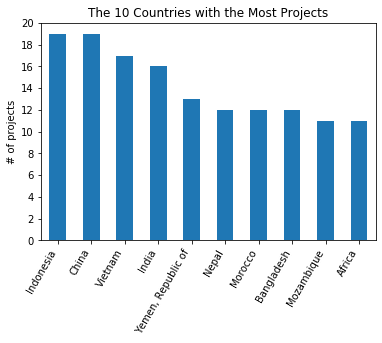

In [6]:
#Count how many times each country is listed in the dataframe, then plot the 10 highest count totals.
json_df['countryshortname'].value_counts()[:10].plot.bar(
    title='The 10 Countries with the Most Projects')

#Add plot details to make it easier to read.
plt.ylabel('# of projects')
plt.yticks(range(0, 21, 2))
plt.xticks(rotation=60, ha='right')
plt.show()

The resulting plot shows that in descending order, Indonesia, China, Vietnam, India, the Republic of Yemen, Nepal, Morocco, Bangladesh, Mozambique, and "Africa" are the countries with the most projects. The "Africa" data is odd, since Africa is not a country, but inspecting other columns that could be used to ID a country gave me no more information about which specific countries these entries may have referred to.

2. Find the top 10 major project themes (using column 'mjtheme_namecode')

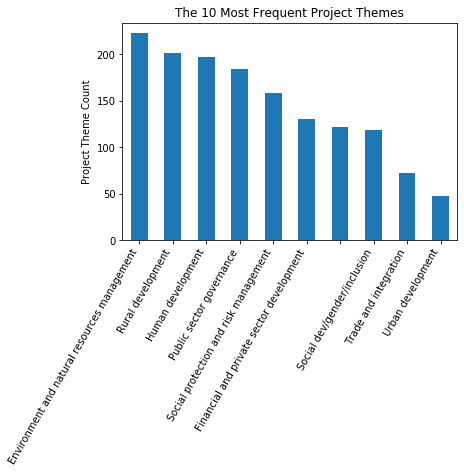

In [9]:
#Extract the theme name/code column. 
theme_codes = json_df['mjtheme_namecode']

#Initialize an empty list.
list_short_df = []

#Normalize each JSON string and add the resulting dataframe to a list.
for item in theme_codes:
    normed = json_normalize(item)
    list_short_df.append(normed)

#Concatenate the list of dataframes.
theme_codes_df = pd.concat(list_short_df)

#Count how often each theme name appears and plot the 10 most frequent themes.
theme_codes_df['name'].value_counts()[:10].plot.bar(
    title='The 10 Most Frequent Project Themes')

#Add plot details.
plt.ylabel('Project Theme Count')
plt.xticks(rotation=60, ha='right')
plt.show()

In descending order, the most common major themes are "Environment and natural resource management," "Rural development," "Human development," "Public sector governance," "Social protection and risk management," Financial and private sector development," an unlabeled bar (more on that below), "Social dev/gender/inclusion," "Trade and integration," and "Urban development."

3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

*Indeed, there seem to be so many missing name values that an empty string registers as one of our most common themes!*

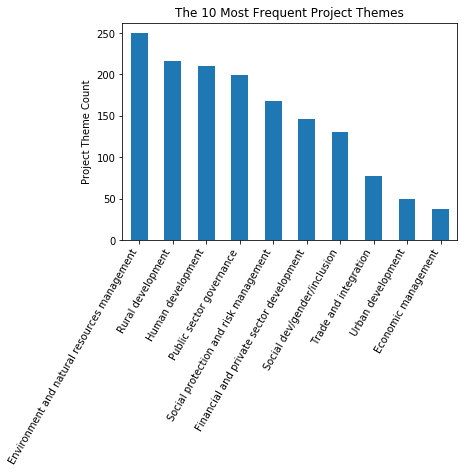

In [10]:
#To fill in the missing values, one strategy is to first sort the dataframe by code, then by name.
#This groups all the nameless entries at the top of their code number set.
theme_codes_df = theme_codes_df.sort_values(['code', 'name'])

#Next, replace the empty strings with NaN values and use bfill() fill the NaN values with the correct name.
#The sorting done in the previous step ensures that each NaN will get its new value from a row with the same code number.
theme_codes_df['name'] = theme_codes_df['name'].replace('', np.nan).bfill()

#Recount how often each theme name appears and plot the 10 most frequent themes.
theme_codes_df['name'].value_counts()[:10].plot.bar(
    title='The 10 Most Frequent Project Themes')

#Add plot details.
plt.ylabel('Project Theme Count')
plt.xticks(rotation=60, ha='right')
plt.show()

The new plot shows the same 9 meaningful themes in the same order as before and now includes the theme "Economic management," which the unnamed themes had prevented from appearing on the plot before.